<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/%5BAgain%5D_Re_Start_Training_ResNet_VAE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README.ME
* Again, Re-Start it!
* Training ResNet-VAE Again!!!


✅ Check Point<br>
> 1. Train ResNet-VAE
> 2. Hyperparameter Optimization
> 3. Save Model's Parameters
> 4. Plot & Save values

<br>
<code>::start:: 20.09.08.Tue pm1:00 ~ </code><br>
<code>::Continue:: 20.09.08.Tue pm 3:10 ~</code><br>
<code>::Add: Plot 20.09.09.Wed pm 1:00</code><br>


---
< Questions ><br>
Q1. ResNet-VAE를 학습시킬때는 Validation Set을 따로 두지 않아도 될까?<br>
-> Training은 Train, Testset만 구성한다?! -20.09.08.Tue. pm3:30-


---

## Mount Drive

In [1]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGQD4n0PoL0Vqvktc1rnDGCpkFsZj3Js8ha8b8ZldI3kq3xubXECZw
Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%cd drive/My\ Drive/Post_InfoSec_Exps/ResNet-VAE/ResNetVAE-master.zip (Unzipped Files)/ResNetVAE-master
! ls

/content/drive/My Drive/Post_InfoSec_Exps/ResNet-VAE/ResNetVAE-master.zip (Unzipped Files)/ResNetVAE-master
'01.Tutorial-ResNet-VAE.ipynb의 사본'
 01.Tutorial-ResNet-VAE-Recon.ipynb
 02.Tutorial-ResNet-VAE-Tunning.ipynb
 03.Tutorial-ResNet-VAE-Tunning.ipynb
'03.Tutorial-ResNet-VAE-Tunning.ipynb의 사본'
'04.Post-01.Tutorial-ResNet-VAE.ipynb사본의 사본'
'05.Post-01.Tutorial-ResNet-VAE_Train_Again.ipynb의 사본'
 Again_ResNet-VAE_Exp01
'[Again] Re-Start_Training_ResNet-VAE .ipynb'
 fig
 generated_Malimg.png
 modules.py
 plot_latent.ipynb
 plot_latent_vector
 plot_train_test_loss
'[Post_Exp]04-2.ResNet-VAE_Train_Again.ipynb'
'[Post_Exp]04-2.ResNet-VAE_Train_Again.ipynb의 사본'
'[Post_Exp]04-3.ResNet-VAE_Train_Again.ipynb'
'[Post_Exp]04-3.ResNet-VAE_Train_Again.ipynb의 사본'
'[Post_Exp]05-2.ResNet-VAE_Reduce_lr.ipynb'
 __pycache__
 README.md
 recon_sampling
 reconstruction_Malimg.png
 ResNetVAE_cifar10.py
 ResNetVAE_FACE.py
 ResNetVAE_MNIST.py
 ResNetVAE_reconstruction.ipynb
 results_

 our working directory results should be saved in 'Again_ResNet-VAE_Exp01'

## 01. Import Library

In [4]:
from PIL import Image
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

# save single numpy array
from tempfile import TemporaryFile
from sklearn.manifold import TSNE

import torch
import torch.utils.data  # torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

import torchvision 
from torchvision import datasets, transforms
from torchvision.utils import save_image

# load modules
from torchvision import models
from modules import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 02. Data Preparation

* Make Custom Dataset
* Make Custom DataLoader
* Train_Test Split

< Notice ><br>
ResNet-VAE 모델을 훈련시킬 때는 데이터셋을 train, test만 준비한다.(Validation set 없이!)<br>
이는 일반적인 VAE Model Tutorial의 학습방식을 따른다. <code>-20.09.08.Tue. pm3:00-</code>

In [5]:
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()])  # Composes several transforms together.

# make custom dataset
trainset = torchvision.datasets.ImageFolder(root='../../../../InformationSecurity_Summer/malimg',
                                            transform=transforms)

In [6]:
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

Split Train Data to Train, Test dataset

In [7]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
print('print train_size, test_size: ', train_size, test_size)

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])  # Randomly split a dataset into non-overlapping new datasets of given lengths. Optionally fix the generator for reproducible results, e.g.:

print train_size, test_size:  7471 1868


In [8]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           pin_memory=True)
valid_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           pin_memory=True)  # (i.e., setting pin_memory=True)
                                                             #  which enables fast data transfer to CUDA-enabled GPUs


3-channel Image 출

In [9]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [10]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([ 2,  2, 15,  2,  2, 24, 24,  2, 24, 22, 12,  2,  4,  2, 11, 16])


torch.Size([16, 3, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 3, 224, 224])
torch.Size([3, 454, 1810])
Allaple.A Allaple.A Lolyda.AT Allaple.A 


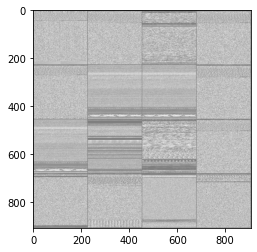

In [11]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(4)))

## 03. Model Architecture

* argparser
* save model parameters
* loss function
* define hyperthesis

✅ Have to-do <br>
> 1. Train ResNet-VAE
> 2. 📌 Hyperparameter Optimization >>> argparser...!!
> 3. 📌 Save Model's Parameters
> 4. 📌 Plot & Save values


In [13]:
# save model
save_model_path = './results_ResNet-VAE_Exp01'  # save_model parameter

In [14]:
def check_mkdir(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

In [15]:
def loss_function(recon_x, x, mu, logvar):
    # MSE = F.mse_loss(recon_x, x, reduction='sum')
    MSE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

model from this repository: https://github.com/hsinyilin19/ResNetVAE/blob/master/modules.py

In [16]:
class ResNet_VAE(nn.Module):
    def __init__(self, fc_hidden1=1024, fc_hidden2=768, drop_p=0.3, CNN_embed_dim=256):
        super(ResNet_VAE, self).__init__()

        self.fc_hidden1, self.fc_hidden2, self.CNN_embed_dim = fc_hidden1, fc_hidden2, CNN_embed_dim

        # CNN architechtures
        self.ch1, self.ch2, self.ch3, self.ch4 = 16, 32, 64, 128
        self.k1, self.k2, self.k3, self.k4 = (5, 5), (3, 3), (3, 3), (3, 3)      # 2d kernal size
        self.s1, self.s2, self.s3, self.s4 = (2, 2), (2, 2), (2, 2), (2, 2)      # 2d strides
        self.pd1, self.pd2, self.pd3, self.pd4 = (0, 0), (0, 0), (0, 0), (0, 0)  # 2d padding

        # encoding components
        resnet = models.resnet152(pretrained=True)
        modules = list(resnet.children())[:-1]      # delete the last fc layer.
        self.resnet = nn.Sequential(*modules)
        self.fc1 = nn.Linear(resnet.fc.in_features, self.fc_hidden1)
        self.bn1 = nn.BatchNorm1d(self.fc_hidden1, momentum=0.01)
        self.fc2 = nn.Linear(self.fc_hidden1, self.fc_hidden2)
        self.bn2 = nn.BatchNorm1d(self.fc_hidden2, momentum=0.01)
        # Latent vectors mu and sigma
        self.fc3_mu = nn.Linear(self.fc_hidden2, self.CNN_embed_dim)      # output = CNN embedding latent variables
        self.fc3_logvar = nn.Linear(self.fc_hidden2, self.CNN_embed_dim)  # output = CNN embedding latent variables

        # Sampling vector
        self.fc4 = nn.Linear(self.CNN_embed_dim, self.fc_hidden2)
        self.fc_bn4 = nn.BatchNorm1d(self.fc_hidden2)
        self.fc5 = nn.Linear(self.fc_hidden2, 64 * 4 * 4)
        self.fc_bn5 = nn.BatchNorm1d(64 * 4 * 4)
        self.relu = nn.ReLU(inplace=True)

        # Decoder
        self.convTrans6 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=self.k4, stride=self.s4,
                               padding=self.pd4),
            nn.BatchNorm2d(32, momentum=0.01),
            nn.ReLU(inplace=True),
        )
        self.convTrans7 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=32, out_channels=8, kernel_size=self.k3, stride=self.s3,
                               padding=self.pd3),
            nn.BatchNorm2d(8, momentum=0.01),
            nn.ReLU(inplace=True),
        )

        self.convTrans8 = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8, out_channels=3, kernel_size=self.k2, stride=self.s2,
                               padding=self.pd2),
            nn.BatchNorm2d(3, momentum=0.01),
            nn.Sigmoid()    # y = (y1, y2, y3) \in [0 ,1]^3
        )


    def encode(self, x):
        x = self.resnet(x)  # ResNet
        x = x.view(x.size(0), -1)  # flatten output of conv

        # FC layers
        x = self.bn1(self.fc1(x))
        x = self.relu(x)
        x = self.bn2(self.fc2(x))
        x = self.relu(x)
        # x = F.dropout(x, p=self.drop_p, training=self.training)
        mu, logvar = self.fc3_mu(x), self.fc3_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        x = self.relu(self.fc_bn4(self.fc4(z)))
        x = self.relu(self.fc_bn5(self.fc5(x))).view(-1, 64, 4, 4)
        x = self.convTrans6(x)
        x = self.convTrans7(x)
        x = self.convTrans8(x)
        x = F.interpolate(x, size=(224, 224), mode='bilinear')
        return x

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_reconst = self.decode(z)

        return x_reconst, z, mu, logvar

## 04. Define Experiment

In [36]:
# Detect devices
use_cuda = torch.cuda.is_available()
print(use_cuda)
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

True
cuda:0


In [24]:
'''
### If you want to use pre-trained model ####
pre_saved_model_path = './results_Malimg'
epoch=20
'''

# Create model
resnet_vae = ResNet_VAE(fc_hidden1=args.CNN_fc_hidden1, fc_hidden2=args.CNN_fc_hidden2, drop_p=args.dropout_p, CNN_embed_dim=args.CNN_embed_dim).to(device)
'''
### If you want to use pre-trained model ####
resnet_vae.load_state_dict(torch.load(os.path.join(pre_saved_model_path, 'model_epoch{}.pth'.format(epoch))))
'''
print('Number of {} parameters'.format(sum(p.numel() for p in resnet_vae.parameters() if p.requires_grad)))
print("Using", torch.cuda.device_count(), "GPU!")
model_params = list(resnet_vae.parameters())
optimizer = torch.optim.Adam(model_params, lr=args.learning_rate)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth



Number of 63158425 parameters
Using 1 GPU!


In [29]:
def train(log_interval, model, device, train_loader, optimizer, epoch):
    # set model as training mode
    model.train()

    losses = []
    all_y, all_z, all_mu, all_logvar = [], [], [], []
    N_count = 0   # counting total trained sample in one epoch
    for batch_idx, (X, y) in enumerate(train_loader):
        # distribute data to device
        X, y = X.to(device), y.to(device).view(-1, )
        N_count += X.size(0)  # count batch_size sample

        optimizer.zero_grad()
        X_reconst, z, mu, logvar = model(X)  # VAE
        loss = loss_function(X_reconst, X, mu, logvar)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

        all_y.extend(y.data.cpu().numpy())
        all_z.extend(z.data.cpu().numpy())
        all_mu.extend(mu.data.cpu().numpy())
        all_logvar.extend(logvar.data.cpu().numpy())

        # show information
        if (batch_idx + 1) % log_interval == 0:  # if batch_size = 16 => 160
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch + 1, N_count, len(train_loader.dataset), 100. * (batch_idx + 1) / len(train_loader), loss.item()))

    # calculate train_loss
    losses /= len(train_loader.dataset)
    all_y = np.stack(all_y, axis=0)
    all_z = np.stack(all_z, axis=0)
    all_mu = np.stack(all_mu, axis=0)
    all_logvar = np.stack(all_logvar, axis=0)

    # save Pytorch models of best record
    torch.save(model.state_dict(), os.path.join(save_model_path, 'model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
    torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
    print("Epoch {} model saved!".format(epoch + 1))

    return X.data.cpu().numpy(), all_y, all_z, all_mu, all_logvar, losses


def validation(model, device, optimizer, test_loader):
    # set model as testing mode
    model.eval()

    test_loss = 0
    all_y, all_z, all_mu, all_logvar = [], [], [], []
    with torch.no_grad():
        for i, (X, y) in enumerate(test_loader):
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )
            X_reconst, z, mu, logvar = model(X)

            loss = loss_function(X_reconst, X, mu, logvar)
            test_loss += loss.item()  # sum up batch loss

            all_y.extend(y.data.cpu().numpy())
            all_z.extend(z.data.cpu().numpy())
            all_mu.extend(mu.data.cpu().numpy())
            all_logvar.extend(logvar.data.cpu().numpy())
            
        ## Save_Recon_Malimg
            if i == 0:
                n = min(X.size(0), 8)
                comparison = torch.cat([X[:n],
                                    X_reconst.view(16, 3, 224, 224)[:n]])  # Recon 4 Images
                save_image(comparison.cpu(),
                        './results_ResNet-VAE_Exp01/recon_sampling/reconstruction_' + str(epoch + 1) + '.png', nrow=n)
                # save_image(comparison.cpu(),
                #         os.path.join(save_model_path, '/recon_sampling/reconstruction{}.png'.format(epoch + 1)))


    test_loss /= len(test_loader.dataset)
    all_y = np.stack(all_y, axis=0)
    all_z = np.stack(all_z, axis=0)
    all_mu = np.stack(all_mu, axis=0)
    all_logvar = np.stack(all_logvar, axis=0)

    # show information
    print('\nTest set ({:d} samples): Average loss: {:.4f}\n'.format(len(test_loader.dataset), test_loss))
    return X.data.cpu().numpy(), all_y, all_z, all_mu, all_logvar, test_loss


In [38]:
# print(resnet_vae)

### Argparse

In [12]:
import argparse

seed = 123
np.random.seed(seed)  # Reseed a legacy MT19937 BitGenerator
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")

args.CNN_fc_hidden1 = 1024
args.CNN_fc_hidden2 = 1024
args.CNN_embed_dim = 256  # latent dim extracted by 2D CNN
args.res_size = 224       # ResNet Image size
args.dropout_p = 0.2           # dropout probability

# training parameters
args.epochs = 20
args.batch_size = 50
args.learning_rate = 1e-3
args.log_interval = 10  # interval for displaying training info

print(args)

Namespace(CNN_embed_dim=256, CNN_fc_hidden1=1024, CNN_fc_hidden2=1024, batch_size=50, dropout_p=0.2, epochs=20, learning_rate=0.001, log_interval=10, res_size=224)


In [30]:
print(args)

Namespace(CNN_embed_dim=256, CNN_fc_hidden1=1024, CNN_fc_hidden2=1024, batch_size=50, dropout_p=0.2, epochs=20, learning_rate=0.001, log_interval=10, res_size=224)


In [31]:
args.epochs = 100
print(args)

Namespace(CNN_embed_dim=256, CNN_fc_hidden1=1024, CNN_fc_hidden2=1024, batch_size=50, dropout_p=0.2, epochs=100, learning_rate=0.001, log_interval=10, res_size=224)


## 05. Experiment

In [42]:
# start training

list_epoch=[]
epoch_train_losses = []
epoch_test_losses = []
list_acc = []
list_acc_epoch =[]
check_mkdir(save_model_path)


for epoch in range(args.epochs):

    # train, test model
    X_train, y_train, z_train, mu_train, logvar_train, epoch_train_loss = train(args.log_interval, resnet_vae, device, train_loader, optimizer, epoch)
    X_test, y_test, z_test, mu_test, logvar_test, epoch_test_loss = validation(resnet_vae, device, optimizer, valid_loader)

    # save results
    list_epoch.append(epoch)
    epoch_train_losses.append(epoch_train_loss)
    epoch_test_losses.append(epoch_test_loss)

    
    # save all train test results
    # A = np.array(all_train_losses)
    B = np.array(epoch_train_losses)
    C = np.array(epoch_test_losses)
    
    # np.save(os.path.join(save_model_path, 'ResNet_VAE_training_loss_all.npy'), A)
    np.save(os.path.join(save_model_path, 'ResNet_VAE_training_loss.npy'), B)
    np.save(os.path.join(save_model_path, 'ResNet_VAE_test_loss.npy'), C)

    np.save(os.path.join(save_model_path, 'X_Malimg_train_epoch{}.npy'.format(epoch + 1)), X_train) #save last batch
    np.save(os.path.join(save_model_path, 'y_Malimg_train_epoch{}.npy'.format(epoch + 1)), y_train)
    np.save(os.path.join(save_model_path, 'z_Malimg_train_epoch{}.npy'.format(epoch + 1)), z_train)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Train Epoch: 1 [320/7471 (4%)]	Loss: 1663872.000000
Train Epoch: 1 [480/7471 (6%)]	Loss: 1673245.250000
Train Epoch: 1 [640/7471 (9%)]	Loss: 1666329.125000
Train Epoch: 1 [800/7471 (11%)]	Loss: 1655970.125000
Train Epoch: 1 [960/7471 (13%)]	Loss: 1652011.250000
Train Epoch: 1 [1120/7471 (15%)]	Loss: 1653168.625000
Train Epoch: 1 [1280/7471 (17%)]	Loss: 1664516.125000
Train Epoch: 1 [1440/7471 (19%)]	Loss: 1650637.125000
Train Epoch: 1 [1600/7471 (21%)]	Loss: 1638597.250000
Train Epoch: 1 [1760/7471 (24%)]	Loss: 1656080.250000
Train Epoch: 1 [1920/7471 (26%)]	Loss: 1664741.750000
Train Epoch: 1 [2080/7471 (28%)]	Loss: 1627625.750000
Train Epoch: 1 [2240/7471 (30%)]	Loss: 1633431.375000
Train Epoch: 1 [2400/7471 (32%)]	Loss: 1643345.000000
Train Epoch: 1 [2560/7471 (34%)]	Loss: 1627399.750000
Train Epoch: 1 [2720/7471 (36%)]	Loss: 1617293.500000
Train Epoch: 1 [2880/7471 (39%)]	Loss: 1625719.125000
Train Epoch: 1 [3040/7471 (41%)]	Loss: 1655760.625000


* make Exp Module for <code>Hyperparameter opitmization</code>

Add-plot<br>
<code>train_val plot</code>

In [58]:
epoch_train_losses = np.load('./results_ResNet-VAE_Exp01/ResNet_VAE_training_loss.npy')
epoch_test_losses = np.load('./results_ResNet-VAE_Exp01/ResNet_VAE_test_loss.npy')

print(epoch_train_losses.shape, epoch_test_losses.shape)

(100, 467) (100,)


<code>batch_size</code>를 argparser에서는 50으로 정해줬는데 결과가 16이라 의아했는데 원인을 찾았다.<br>
<br>


Train_Loader에서 batch_size를 16으로 정해줬었어...!!

In [59]:
print(epoch_train_losses.shape, epoch_test_losses.shape)
print(epoch_train_losses[0].shape)

print(len(train_loader.dataset))
print(len(valid_loader.dataset))

(100, 467) (100,)
(467,)
7471
1868


In [60]:
epoch_train_loss = np.array(np.sum(epoch_train_losses, axis=1)/len(train_loader))
print(type(epoch_train_loss), epoch_train_loss.shape)
print(type(epoch_test_losses), epoch_test_losses.shape)

<class 'numpy.ndarray'> (100,)
<class 'numpy.ndarray'> (100,)


In [64]:
# print(epoch_train_loss)
print(epoch_train_loss)
print(epoch_test_losses)

[1638542.16300857 1620145.3011242  1613838.34635974 1611309.79309422
 1609294.58110278 1604131.50910064 1605361.17665953 1603169.00722698
 1597750.57842612 1594670.69566381 1596908.4638651  1594820.83110278
 1591787.57441113 1589724.83458244 1589253.08003212 1590662.44619914
 1587715.87794433 1586307.64052463 1585468.14641328 1586667.18843683
 1585635.30995717 1584972.41595289 1584345.36911135 1585177.11482869
 1584231.52382227 1584188.90042827 1582912.37044968 1583511.24116702
 1584135.60626338 1582163.17773019 1582088.10438972 1581855.36911135
 1581567.88436831 1581862.14025696 1581171.07441113 1580937.06343683
 1580699.83752677 1579828.38356531 1580349.66675589 1580600.1761242
 1580038.31664882 1579667.83244111 1579829.20262313 1579679.86589936
 1579711.6988758  1578713.22135974 1578928.89400428 1578330.98420771
 1578694.30968951 1578644.82601713 1578315.04255889 1577831.36884368
 1577992.97698073 1577751.36643469 1577560.05888651 1577430.78988223
 1577293.02248394 1577069.23688437 

In [36]:
list_epoch = np.array(range(100))
list_epoch

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

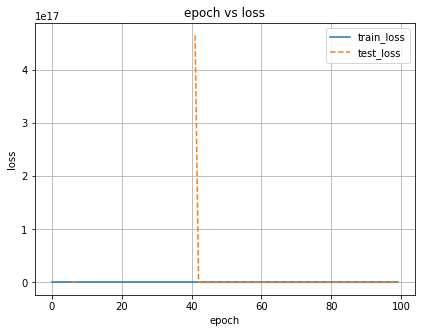

In [37]:
# Reference: Stand-DL Assignment #1

# ======== Loss Fluctuation ======== #
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, epoch_train_loss, label='train_loss')
ax1.plot(list_epoch, epoch_test_losses, '--', label='test_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ======== save plot ======== #
plt.savefig('./train_val_plot.png', dpi=300)
plt.show()


### Epoch별로 loss graph를 그려볼까??

In [38]:
# Backup Code

backup_epoch_train_loss = epoch_train_loss
backup_epoch_test_loss = epoch_test_losses

In [52]:
# Reference: Stand-DL Assignment #1

# ======== Loss Fluctuation ======== #
def plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(list_epoch, epoch_train_losses, label='train_loss')
    ax1.plot(list_epoch, epoch_test_losses, '--', label='test_loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.grid()
    ax1.legend()
    ax1.set_title('epoch vs loss')

    # ======== save plot ======== #
    plt.savefig('./results_ResNet-VAE_Exp01/loss_plot/{}train_val_plot.png'.format(list_epoch[-1]+1), dpi=300)
    plt.show()


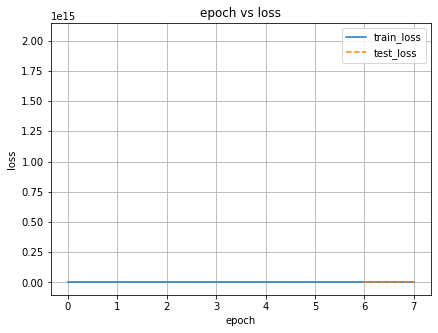

In [54]:
# 01. 0 Epoch ~ 8 Epoch
list_epoch = np.array(range(8))
epoch_train_losses = backup_epoch_train_loss[:8]
epoch_test_losses = backup_epoch_test_loss[:8]

plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses)

<code>::Epoch 0 to 10::</code>


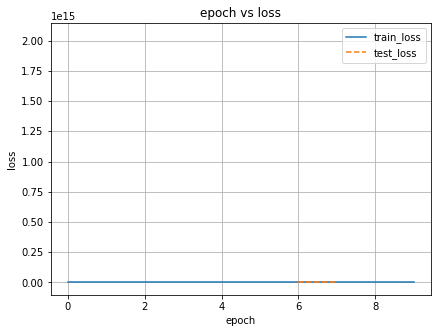

In [53]:
# 01. 0 Epoch ~ 10 Epoch
list_epoch = np.array(range(10))
epoch_train_losses = backup_epoch_train_loss[:10]
epoch_test_losses = backup_epoch_test_loss[:10]

plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses)

<code>::Epoch 0 to 20::</code>


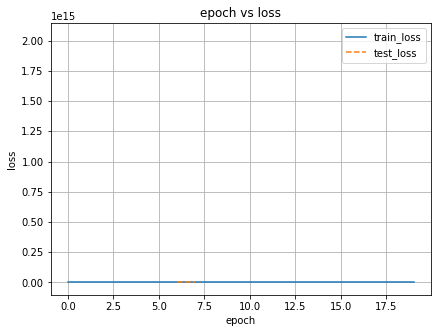

In [47]:
# 01. 0 Epoch ~ 20 Epoch
list_epoch = np.array(range(20))
epoch_train_losses = backup_epoch_train_loss[:20]
epoch_test_losses = backup_epoch_test_loss[:20]

plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses)

<code>::Epoch 0 to 20::</code>

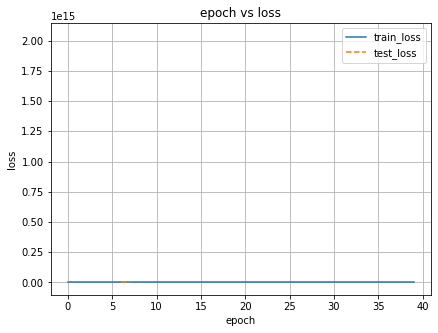

In [48]:
# 02. 0 Epoch ~ 40 Epoch
list_epoch = np.array(range(40))
epoch_train_losses = backup_epoch_train_loss[:40]
epoch_test_losses = backup_epoch_test_loss[:40]

plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses)

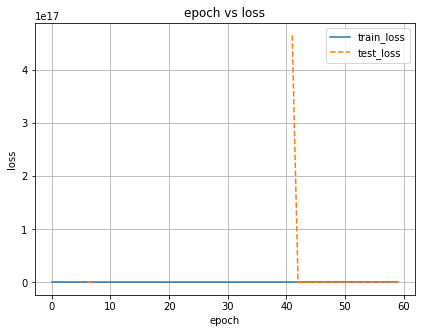

In [49]:
# 03. 0 Epoch ~ 60 Epoch
list_epoch = np.array(range(60))
epoch_train_losses = backup_epoch_train_loss[:60]
epoch_test_losses = backup_epoch_test_loss[:60]

plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses)

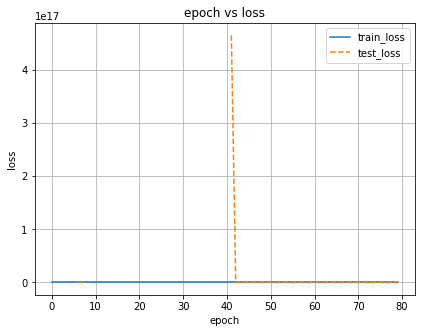

In [50]:
# 03. 0 Epoch ~ 80 Epoch
list_epoch = np.array(range(80))
epoch_train_losses = backup_epoch_train_loss[:80]
epoch_test_losses = backup_epoch_test_loss[:80]

plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses)

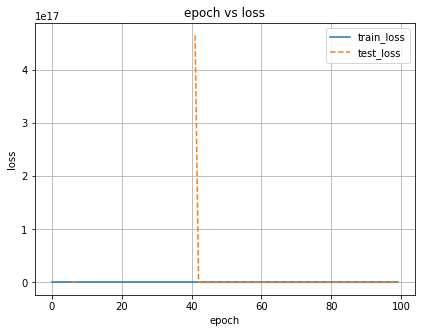

In [51]:
# 03. 0 Epoch ~ 100 Epoch
list_epoch = np.array(range(100))
epoch_train_losses = backup_epoch_train_loss[:]
epoch_test_losses = backup_epoch_test_loss[:]

plot_loss_function(list_epoch, epoch_train_losses, epoch_test_losses)

In [33]:
print(device)

cuda:0


# Classification

### Data Preparation
* train, val, test split

In [19]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])

# make custom dataset 
# use torchvision.datasets.ImageFolder()
trainset = torchvision.datasets.ImageFolder(root='../../../../InformationSecurity_Summer/malimg',
                                            transform=transforms)  # make custom dataset

AttributeError: ignored

In [ ]:
full_dataset = trainset

# maek train, val, test: 8:1:1
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
print(train_size, val_size, test_size)

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

In [ ]:
# make custom data_loader
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True)
val_loader = DataLoader(val_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)
 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

# First, insert all test dataset
# z_loader: for latent vector extraction
z_loader = DataLoader(full_dataset,
                        batch_size=9339,
                        shuffle=True,
                        pin_memory=True)